In [1]:
import pandas as pd
message = pd.read_csv('dataset//spam.csv', encoding='latin-1')
df = message[['v1', 'v2']]
df.columns = ['label', 'text']

In [2]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [5]:
from nltk.corpus import stopwords
corpus = []
for i in range(0, len(df['text'])):
    review = re.sub('[^a-zA-Z]',' ',df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 2500, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [7]:
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = classifier.predict(x_test)

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_test, y_pred))

0.9802690582959641
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
class_names = sorted(df['label'].unique()) 
print(class_names)

['ham', 'spam']


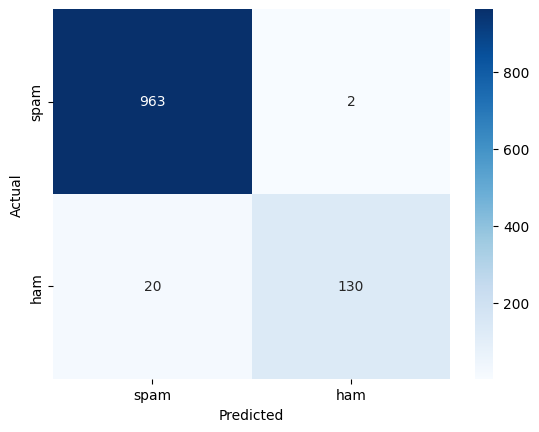

In [13]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['spam','ham']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()